In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
pd.set_option('display.max_columns', None)

In [92]:
df = pd.read_csv('train.csv')

In [93]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [95]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [96]:
len(df['PassengerId'].unique())

891

In [97]:
df.drop(columns=['PassengerId'],inplace=True)

In [98]:
y = df['Survived']

In [99]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [100]:
df.drop(columns=['Survived'], inplace=True)

In [101]:
df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [102]:
df.duplicated().sum()

np.int64(0)

In [103]:
def title_extractor(name):
    if 'Mr' in name:
        return'Mr'
    elif 'Mrs' in name or 'Mme' in name:
        return 'Mrs'
    elif 'Miss' in name or 'Mlle' in name:
        return 'Miss'
    elif 'Ms' in name:
        return 'Ms'
    elif 'Rev' in name:
        return 'Rev'
    elif 'Master' in name:
        return 'Master'
    elif 'Major' in name:
        return 'Major'
    elif 'Dr' in name:
        return 'Dr'
    elif 'Col' in name:
        return 'Col'
    elif 'Capt' in name:
        return 'Capt'
    elif 'Countess' in name:
        return 'Countess'
    elif 'Jonkheer' in name:
        return 'Jonkheer'
    elif 'Don' in name:
        return 'Don'

In [104]:
df['Title'] = df['Name'].apply(title_extractor)

In [105]:
df['Title'].unique()

array(['Mr', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mrs', 'Ms', 'Major',
       'Col', 'Capt', 'Countess', 'Jonkheer'], dtype=object)

In [ ]:
df.drop(columns=['Name'], inplace=True)

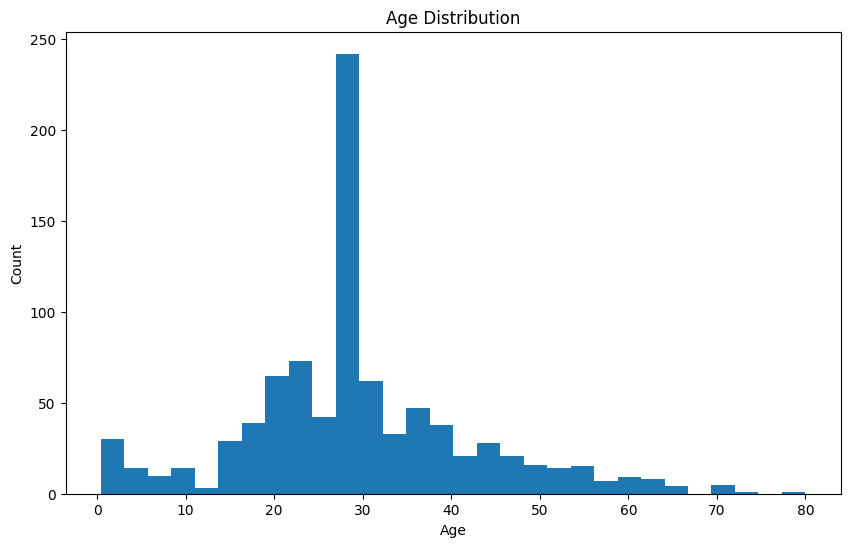

In [134]:
plt.figure(figsize=(10,6))
plt.hist(df['Age'].dropna(), bins=30)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

In [107]:
df['Age'].fillna(df['Age'].median(), inplace=True)

/var/folders/l_/z89jsksj64db5cwl1zt337zh0000gn/T/ipykernel_71721/1933487976.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [108]:
df.isna().sum()

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
Title         0
dtype: int64

In [109]:
df['Ticket_num'] = df['Ticket'].astype(str).str.split().str[-1]

In [110]:
df.drop(columns=['Ticket'], inplace=True)

In [111]:
locator = df[['Fare', 'Cabin']].groupby('Cabin').mean()
locator

,Fare
Cabin,
A10,40.125000
A14,52.000000
A16,39.600000
A19,26.000000
A20,56.929200
...,...
F33,11.333333
F38,7.750000
F4,39.000000


In [112]:
fare_to_cabin =df.loc[df['Cabin'].isna(), 'Fare'].value_counts().sort_values(ascending=False)
fare_to_cabin

Fare
8.0500     42
7.8958     38
13.0000    38
7.7500     33
26.0000    27
           ..
8.6833      1
8.5167      1
7.8875      1
6.4500      1
10.5167     1
Name: count, Length: 178, dtype: int64

In [113]:
for i in range(len(fare_to_cabin)):
    fare = fare_to_cabin.index[i]
    try:
        cabin = locator[locator['Fare'] == fare].index[0]
    except IndexError:
        cabin = 'Unknown'
    df.loc[df['Cabin'].isna() & (df['Fare'] == fare), 'Cabin'] = cabin

In [114]:
df['Embarked'].fillna('U', inplace=True)

/var/folders/l_/z89jsksj64db5cwl1zt337zh0000gn/T/ipykernel_71721/472442339.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna('U', inplace=True)


In [115]:
df.isna().sum()

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin         0
Embarked      0
Title         0
Ticket_num    0
dtype: int64

In [116]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,Ticket_num
0,3,male,22.0,1,0,7.2500,Unknown,S,Mr,21171
1,1,female,38.0,1,0,71.2833,C85,C,Mr,17599
2,3,female,26.0,0,0,7.9250,Unknown,S,Miss,3101282
3,1,female,35.0,1,0,53.1000,C123,S,Mr,113803
4,3,male,35.0,0,0,8.0500,E10,S,Mr,373450


In [117]:
num_df = df.select_dtypes(include=['int64', 'float64'])
spearman_corr = num_df.corr(method='spearman')
print(spearman_corr)

          Pclass       Age     SibSp     Parch      Fare
Pclass  1.000000 -0.317406 -0.043019 -0.022801 -0.688032
Age    -0.317406  1.000000 -0.145316 -0.217488  0.126006
SibSp  -0.043019 -0.145316  1.000000  0.450014  0.447113
Parch  -0.022801 -0.217488  0.450014  1.000000  0.410074
Fare   -0.688032  0.126006  0.447113  0.410074  1.000000


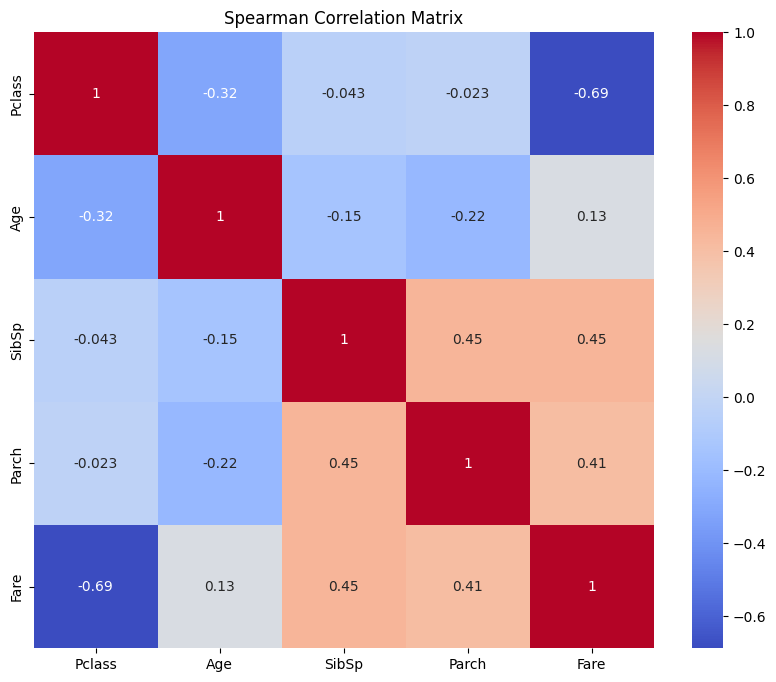

In [118]:
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm')
plt.title('Spearman Correlation Matrix')
plt.show()

In [119]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Cabin_A14,Cabin_A16,Cabin_A19,Cabin_A20,Cabin_A23,Cabin_A24,Cabin_A26,Cabin_A31,Cabin_A32,Cabin_A34,Cabin_A36,Cabin_A5,Cabin_A6,Cabin_A7,Cabin_B101,Cabin_B102,Cabin_B18,Cabin_B19,Cabin_B20,Cabin_B22,Cabin_B28,Cabin_B3,Cabin_B30,Cabin_B35,Cabin_B37,Cabin_B38,Cabin_B39,Cabin_B4,Cabin_B41,Cabin_B42,Cabin_B49,Cabin_B5,Cabin_B50,Cabin_B51 B53 B55,Cabin_B57 B59 B63 B66,Cabin_B58 B60,Cabin_B69,Cabin_B71,Cabin_B73,Cabin_B77,Cabin_B78,Cabin_B79,Cabin_B80,Cabin_B82 B84,Cabin_B86,Cabin_B94,Cabin_B96 B98,Cabin_C101,Cabin_C103,Cabin_C104,Cabin_C106,Cabin_C110,Cabin_C111,Cabin_C118,Cabin_C123,Cabin_C124,Cabin_C125,Cabin_C126,Cabin_C128,Cabin_C148,Cabin_C2,Cabin_C22 C26,Cabin_C23 C25 C27,Cabin_C30,Cabin_C32,Cabin_C45,Cabin_C46,Cabin_C47,Cabin_C49,Cabin_C50,Cabin_C52,Cabin_C54,Cabin_C62 C64,Cabin_C65,Cabin_C68,Cabin_C7,Cabin_C70,Cabin_C78,Cabin_C82,Cabin_C83,Cabin_C85,Cabin_C86,Cabin_C87,Cabin_C90,Cabin_C91,Cabin_C92,Cabin_C93,Cabin_C95,Cabin_C99,Cabin_D,Cabin_D10 D12,Cabin_D11,Cabin_D15,Cabin_D17,Cabin_D19,Cabin_D20,Cabin_D21,Cabin_D26,Cabin_D28,Cabin_D30,Cabin_D33,Cabin_D35,Cabin_D36,Cabin_D37,Cabin_D45,Cabin_D46,Cabin_D47,Cabin_D48,Cabin_D49,Cabin_D50,Cabin_D56,Cabin_D6,Cabin_D7,Cabin_D9,Cabin_E10,Cabin_E101,Cabin_E12,Cabin_E121,Cabin_E17,Cabin_E24,Cabin_E25,Cabin_E31,Cabin_E33,Cabin_E34,Cabin_E36,Cabin_E38,Cabin_E40,Cabin_E44,Cabin_E46,Cabin_E49,Cabin_E50,Cabin_E58,Cabin_E63,Cabin_E67,Cabin_E68,Cabin_E77,Cabin_E8,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Cabin_Unknown,Embarked_Q,Embarked_S,Embarked_U,Title_Col,Title_Countess,Title_Don,Title_Dr,Title_Jonkheer,Title_Major,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Ticket_num_110152,Ticket_num_110413,Ticket_num_110465,Ticket_num_110564,Ticket_num_110813,Ticket_num_111240,Ticket_num_111320,Ticket_num_111361,Ticket_num_111369,Ticket_num_111426,Ticket_num_111427,Ticket_num_111428,Ticket_num_112050,Ticket_num_112052,Ticket_num_112053,Ticket_num_112058,Ticket_num_112059,Ticket_num_11206,Ticket_num_112277,Ticket_num_112379,Ticket_num_113028,Ticket_num_113043,Ticket_num_113050,Ticket_num_113051,Ticket_num_113055,Ticket_num_113056,Ticket_num_113059,Ticket_num_113501,Ticket_num_113503,Ticket_num_113505,Ticket_num_113509,Ticket_num_113510,Ticket_num_113514,Ticket_num_113572,Ticket_num_113760,Ticket_num_113767,Ticket_num_113773,Ticket_num_113776,Ticket_num_113781,Ticket_num_113783,Ticket_num_113784,Ticket_num_113786,Ticket_num_113787,Ticket_num_113788,Ticket_num_113789,Ticket_num_113792,Ticket_num_113794,Ticket_num_113796,Ticket_num_113798,Ticket_num_113800,Ticket_num_113803,Ticket_num_113804,Ticket_num_113806,Ticket_num_113807,Ticket_num_1166,Ticket_num_11668,Ticket_num_11751,Ticket_num_11752,Ticket_num_11753,Ticket_num_11755,Ticket_num_11765,Ticket_num_11767,Ticket_num_11769,Ticket_num_11771,Ticket_num_11774,Ticket_num_11813,Ticket_num_11967,Ticket_num_12233,Ticket_num_12460,Ticket_num_12749,Ticket_num_12750,Ticket_num_13032,Ticket_num_13049,Ticket_num_13213,Ticket_num_13214,Ticket_num_13502,Ticket_num_13507,Ticket_num_13509,Ticket_num_13528,Ticket_num_13529,Ticket_num_13531,Ticket_num_13567,Ticket_num_13568,Ticket_num_14208,Ticket_num_14258,Ticket_num_14263,Ticket_num_14311,Ticket_num_14312,Ticket_num_14313,Ticket_num_14879,Ticket_num_14885,Ticket_num_14973,Ticket_num_1585,Ticket_num_1601,Ticket_num_16966,Ticket_num_16988,Ticket_num_17248,Ticket_num_17318,Ticket_num_17369,Ticket_num_17421,Ticket_num_17453,Ticket_num_17463,Ticket_num_17464,Ticket_num_17465,Ticket_num_17466,Ticket_num_17473,Ticket_num_17474,Ticket_num_17475,Ticket_num_17476,Ticket_num_17477,Ticket_num_1748,Ticket_num_17482,Ticket_num_17483,Ticket_num_17485,Ticket_num_17558,Ticket_num_17569,Ticket_num_17572,Ticket_num_17582,Ticket_num_17585,Ticket_num_17590,Ticket_num_17592,Ticket_num_17593,Ticket_num_17595,Ticket_num_17596,Ticket_num_17597,Ticket_num_17599,Ticket_num_17600,Ticket_num_17601,Ticket_num_17603,Ticket_num_17604,Ticket_

In [120]:
df_encoded.shape

(891, 846)

In [121]:
from sklearn.model_selection import train_test_split

In [122]:
X_train, X_test, y_train, y_test = train_test_split(
    df_encoded, y,
    test_size=0.2,         
    stratify=y,            
    random_state=42        
)

In [123]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [124]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [125]:
rf_model = RandomForestClassifier(n_jobs=-1, random_state=42)

In [126]:
param_grid = {
    "n_estimators" : [80, 90, 100, 110],
    "max_depth" : [None, 30, 50, 75, 200],
    "min_samples_split" : [8, 9, 10, 15],
    "min_samples_leaf" : [1, 2, 4],
}

In [127]:
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=cv,
    n_jobs=-1,
    refit=True,
    verbose=1
)

In [128]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [None, 30, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [8, 9, ...], 'n_estimators': [80, 90, ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,80


In [129]:
print("Best params:", grid_search.best_params_)

Best params: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 80}


In [130]:
print("Best CV accuracy:", grid_search.best_score_)

Best CV accuracy: 0.8440756426671919


In [131]:
y_pred = grid_search.predict(X_test)

In [132]:
print("Test accuracy:", accuracy_score(y_test, y_pred))

Test accuracy: 0.8044692737430168
